In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

df_train = pd.read_csv(f"/kaggle/input/titanic/train.csv")
df_test = pd.read_csv(f"/kaggle/input/titanic/test.csv")
gender = pd.read_csv(f"/kaggle/input/titanic/gender_submission.csv")


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Check correlation between variable to fix missing values**

<AxesSubplot:>

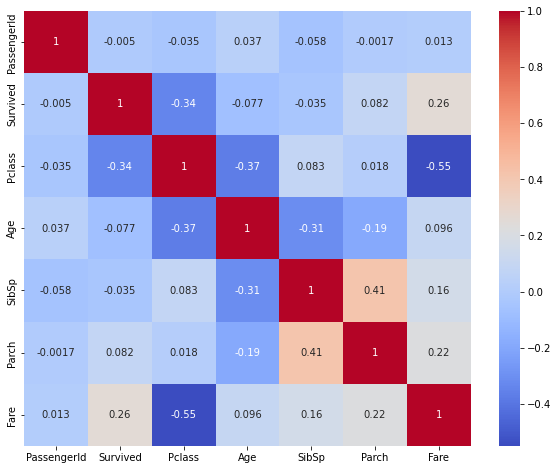

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)

In [ ]:
age_ref = pd.DataFrame(data=[df_train.groupby('Pclass')['Age'].mean()],columns=df_train['Pclass'].unique())
def fill_age(pclass,age):
    if pd.isnull(age):
        return float(age_ref[pclass])
    else:
        return age

df_train['Age'] = df_train.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)
df_test['Age'] = df_test.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [ ]:
# now fix missing values in embarked and fare. For embarked, we use S for x reason, for Fare we use mean since manca solo un valore
def fill_fare(fare):
    if pd.isnull(fare):
        return df_train['Fare'].mean()
    else:
        return fare
df_test['Fare'] = df_test.apply(lambda x: fill_fare(x['Fare']), axis=1)
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [ ]:
# count family size
def get_size(df):
    if df['SibSp'] + df['Parch'] + 1 == 1:
        return 'Single'
    if df['SibSp'] + df['Parch'] + 1 > 1:
        return 'Small'
    if df['SibSp'] + df['Parch'] + 1 > 4:
        return 'Big'
    
df_train['FamilySize'] = df_train.apply(get_size,axis=1)
df_test['FamilySize'] = df_test.apply(get_size,axis=1)
df_train['IsAlone'] = 1 
df_train['IsAlone'].loc[df_train['FamilySize'] != 'Single'] = 0
df_test['IsAlone'] = 1 
df_test['IsAlone'].loc[df_test['FamilySize'] != 'Single'] = 0
df_train

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Small,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Small,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Single,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Small,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Single,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,Single,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,Single,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Small,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,Single,1


In [ ]:
# manage names
title_list = list()
for title in df_train['Name']:
    title = title.split('.')[0].split(',')[1]
    title_list.append(title)
df_train['Title'] = title_list
title_list = list()
for title in df_test['Name']:
    title = title.split('.')[0].split(',')[1]
    title_list.append(title)
df_test['Title'] = title_list


df_train['Title'] = df_train['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
df_test['Title'] = df_test['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer',' Dona'], 'Others')


In [ ]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Embarked', 'Sex', 'FamilySize', 'Title']
for feature in non_numeric_features:        
    df_train[feature] = LabelEncoder().fit_transform(df_train[feature])
    df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

In [ ]:
feature = df_train.drop(['Survived','PassengerId','Name','Ticket', 'Cabin', 'IsAlone', 'SibSp', 'Parch', 'Fare'], axis = 1)
label = df_train['Survived']
test = df_test.drop([ 'Name','PassengerId','Ticket', 'Cabin', 'IsAlone', 'SibSp', 'Parch', 'Fare'], axis = 1)
feature

,Pclass,Sex,Age,Embarked,FamilySize,Title
0,3,1,22.00000,2,1,2
1,1,0,38.00000,0,1,3
2,3,0,26.00000,2,0,1
3,1,0,35.00000,2,1,3
4,3,1,35.00000,2,0,2
...,...,...,...,...,...,...
886,2,1,27.00000,2,0,4
887,1,0,19.00000,2,0,1
888,3,0,25.14062,2,1,1
889,1,1,26.00000,0,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression

def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e1, log=True)
    max_iter = trial.suggest_int("max_iter", 50, 3000)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear"])
    penalty = trial.suggest_categorical("penalty", ["l2"])

    LRC = LogisticRegression(C=logreg_c,max_iter=max_iter,solver=solver,penalty=penalty)
    LRC.fit(X_train, y_train)
    return 1.0 - accuracy_score(y_test, LRC.predict(X_test))
study = optuna.create_study()
study.optimize(objective, n_trials = 500)
print(study.best_params)
print(1.0 - study.best_value)

hyperparameters = {
'C':np.logspace(0, 10, 50), 
'penalty':['l2'],
'random_state':[42],
'max_iter':[200,500,1000],
'solver':['newton-cg', 'lbfgs', 'liblinear']
}
modellrOpt = LogisticRegression(C=study.best_params.get('logreg_c'),max_iter=study.best_params.get('max_iter'),solver=study.best_params.get('solver'),penalty=study.best_params.get('penalty'))

[I 2023-02-26 16:23:47,439] A new study created in memory with name: no-name-d8d1810a-9521-4ffc-8a56-3f4809767eab
[I 2023-02-26 16:23:47,448] Trial 0 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 1.7048056202117413e-08, 'max_iter': 1290, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.44692737430167595.
[I 2023-02-26 16:23:47,456] Trial 1 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 2.2815901616263025e-09, 'max_iter': 1854, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.44692737430167595.
[I 2023-02-26 16:23:47,472] Trial 2 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 0.0004005446910105252, 'max_iter': 1722, 'solver': 'lbfgs', 'penalty': 'l2'}. Best is trial 0 with value: 0.44692737430167595.
[I 2023-02-26 16:23:47,480] Trial 3 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 0.00011303044597830693, 'max_iter': 1901, 'solver': 'liblinear', 'penal

{'logreg_c': 0.08282037018201573, 'max_iter': 1755, 'solver': 'newton-cg', 'penalty': 'l2'}
0.8212290502793296


In [ ]:

#rfOpt.fit(X_train, y_train)

#pred=rfOpt.predict(X_test)
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
modellrOpt.fit(X_train, y_train)
predictions = modellrOpt.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

predictions_test = modellrOpt.predict(test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_test})
output.head()



              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.90      0.68      0.77        80

    accuracy                           0.82       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



[[93  6]
 [26 54]]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [28]:
df_train = pd.read_csv(f"dataset/train.csv")
df_test = pd.read_csv(f"dataset/test.csv")
gender = pd.read_csv(f"dataset/gender_submission.csv")

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Check correlation between variable to fix missing values

C:\Users\ivanv\AppData\Local\Temp\ipykernel_13540\1256251084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)


<Axes: >

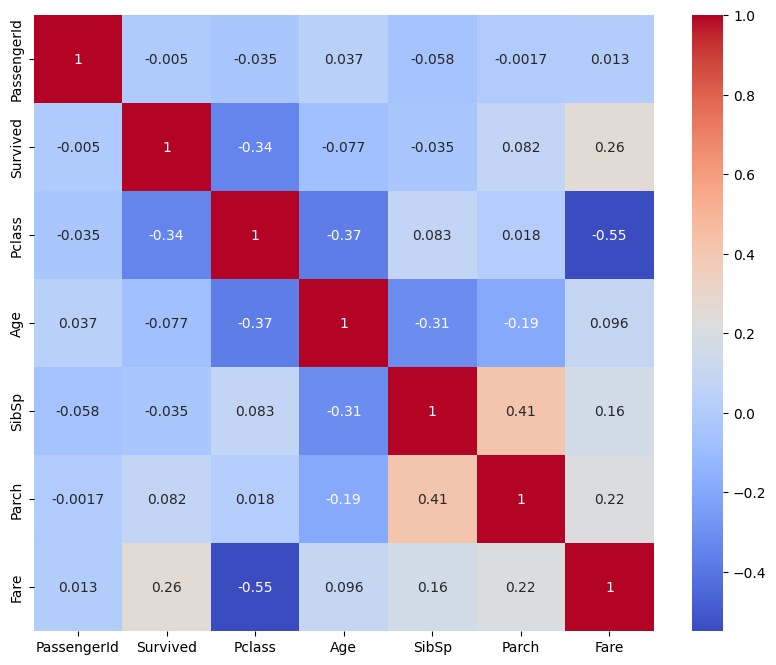

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)

In [33]:
age_ref = pd.DataFrame(data=[df_train.groupby('Pclass')['Age'].mean()],columns=df_train['Pclass'].unique())
def fill_age(pclass,age):
    if pd.isnull(age):
        return float(age_ref[pclass])
    else:
        return age

df_train['Age'] = df_train.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)
df_test['Age'] = df_test.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [34]:
# now fix missing values in embarked and fare. For embarked, we use S for x reason, for Fare we use mean since manca solo un valore
def fill_fare(fare):
    if pd.isnull(fare):
        return df_train['Fare'].mean()
    else:
        return fare
df_test['Fare'] = df_test.apply(lambda x: fill_fare(x['Fare']), axis=1)
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [35]:
# count family size
def get_size(df):
    if df['SibSp'] + df['Parch'] + 1 == 1:
        return 'Single'
    if df['SibSp'] + df['Parch'] + 1 > 1:
        return 'Small'
    if df['SibSp'] + df['Parch'] + 1 > 4:
        return 'Big'
    
df_train['FamilySize'] = df_train.apply(get_size,axis=1)
df_test['FamilySize'] = df_test.apply(get_size,axis=1)
df_train['IsAlone'] = 1 
df_train['IsAlone'].loc[df_train['FamilySize'] != 'Single'] = 0
df_test['IsAlone'] = 1 
df_test['IsAlone'].loc[df_test['FamilySize'] != 'Single'] = 0
df_train

C:\Users\ivanv\AppData\Local\Temp\ipykernel_13540\3608583727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['IsAlone'].loc[df_train['FamilySize'] != 'Single'] = 0
C:\Users\ivanv\AppData\Local\Temp\ipykernel_13540\3608583727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['IsAlone'].loc[df_test['FamilySize'] != 'Single'] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Small,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Small,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Single,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Small,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Single,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,Single,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,Single,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Small,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,Single,1


In [36]:
# manage names
title_list = list()
for title in df_train['Name']:
    title = title.split('.')[0].split(',')[1]
    title_list.append(title)
df_train['Title'] = title_list
title_list = list()
for title in df_test['Name']:
    title = title.split('.')[0].split(',')[1]
    title_list.append(title)
df_test['Title'] = title_list


df_train['Title'] = df_train['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
df_test['Title'] = df_test['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer',' Dona'], 'Others')


In [37]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Embarked', 'Sex', 'FamilySize', 'Title']
for feature in non_numeric_features:        
    df_train[feature] = LabelEncoder().fit_transform(df_train[feature])
    df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

In [38]:
feature = df_train.drop(['Survived','PassengerId','Name','Ticket', 'Cabin', 'IsAlone', 'SibSp', 'Parch', 'Fare'], axis = 1)
label = df_train['Survived']
test = df_test.drop([ 'Name','PassengerId','Ticket', 'Cabin', 'IsAlone', 'SibSp', 'Parch', 'Fare'], axis = 1)
feature

,Pclass,Sex,Age,Embarked,FamilySize,Title
0,3,1,22.00000,2,1,2
1,1,0,38.00000,0,1,3
2,3,0,26.00000,2,0,1
3,1,0,35.00000,2,1,3
4,3,1,35.00000,2,0,2
...,...,...,...,...,...,...
886,2,1,27.00000,2,0,4
887,1,0,19.00000,2,0,1
888,3,0,25.14062,2,1,1
889,1,1,26.00000,0,0,2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=101)

In [40]:
import optuna
from sklearn.linear_model import LogisticRegression

def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e1, log=True)
    max_iter = trial.suggest_int("max_iter", 50, 3000)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear"])
    penalty = trial.suggest_categorical("penalty", ["l2"])

    LRC = LogisticRegression(C=logreg_c,max_iter=max_iter,solver=solver,penalty=penalty)
    LRC.fit(X_train, y_train)
    return 1.0 - accuracy_score(y_test, LRC.predict(X_test))
study = optuna.create_study()
study.optimize(objective, n_trials = 500)
print(study.best_params)
print(1.0 - study.best_value)

hyperparameters = {
'C':np.logspace(0, 10, 50), 
'penalty':['l2'],
'random_state':[42],
'max_iter':[200,500,1000],
'solver':['newton-cg', 'lbfgs', 'liblinear']
}
modellrOpt = LogisticRegression(C=study.best_params.get('logreg_c'),max_iter=study.best_params.get('max_iter'),solver=study.best_params.get('solver'),penalty=study.best_params.get('penalty'))

#rfOpt.fit(X_train, y_train)

#pred=rfOpt.predict(X_test)
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
modellrOpt.fit(X_train, y_train)
predictions = modellrOpt.predict(test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

predictions=model.predict(test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")
output.head()

c:\Users\ivanv\Desktop\code\kaggle-titanic\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-02-26 17:17:25,540] A new study created in memory with name: no-name-28f41768-3eb3-47c1-894c-5164bc662f64
[I 2023-02-26 17:17:25,553] Trial 0 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 2.1654211046217666e-07, 'max_iter': 2634, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.44692737430167595.
[I 2023-02-26 17:17:25,581] Trial 1 finished with value: 0.2011173184357542 and parameters: {'logreg_c': 7.654960717590558, 'max_iter': 1090, 'solver': 'newton-cg', 'penalty': 'l2'}. Best is trial 1 with value: 0.2011173184357542.
[I 2023-02-26 17:17:25,596] Trial 2 finished with value: 0.44692737430167595 and parameters: {'logreg_c': 5.0994683919695724e-08, 'max_iter': 123

KeyboardInterrupt: 